In [ ]:
import pandas as pd

df = pd.read_csv('weatherHistory.csv')
# link to dataset: https://www.kaggle.com/datasets/budincsevity/szeged-weather

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#data cleaning
df['Precip Type'].fillna('None', inplace=True)

print(df.isnull().sum())

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')
print(df['Formatted Date'].head())

<ipython-input-2-f0e65f06121e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna('None', inplace=True)


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
0    2006-04-01 00:00:00+02:00
1    2006-04-01 01:00:00+02:00
2    2006-04-01 02:00:00+02:00
3    2006-04-01 03:00:00+02:00
4    2006-04-01 04:00:00+02:00
Name: Formatted Date, dtype: object


<ipython-input-2-f0e65f06121e>:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


# **kNN**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=10)

In [ ]:
param_grid = {'n_neighbors': range(1, 25)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 21


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print(f"RMSE: {knn_rmse:.3f}")
print(f"MSE: {knn_mse:.3f}")
print(f"R²: {knn_r2:.3f}")

y_train_pred = knn.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = knn.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse:.3f}, MSE: {train_mse:.3f}, R²: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}, MSE: {test_mse:.3f}, R²: {test_r2:.3f}")


RMSE: 1.044
MSE: 1.089
R²: 0.990
Training RMSE: 1.004, MSE: 1.007, R²: 0.991
Test RMSE: 1.044, MSE: 1.089, R²: 0.990


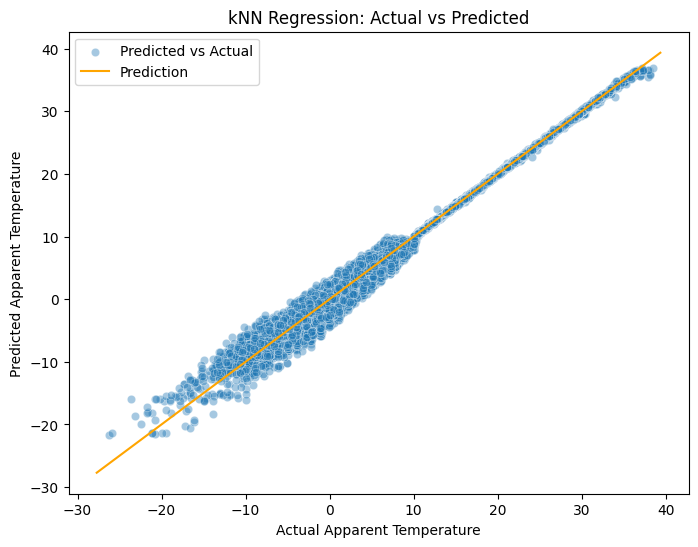

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', label='Prediction')
plt.xlabel('Actual Apparent Temperature')
plt.ylabel('Predicted Apparent Temperature')
plt.title('kNN Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

knn = KNeighborsRegressor(n_neighbors=21)
kf = KFold(n_splits=10, shuffle=True, random_state=10)

cross_val_rmse = cross_val_score(knn, X, y, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Cross-validation RMSE for each fold: {-cross_val_rmse}")
print(f"Mean RMSE: {-cross_val_rmse.mean():.3f}")
print(f"Standard deviation of RMSE: {-cross_val_rmse.std():.3f}")

cross_val_r2 = cross_val_score(knn, X, y, cv=kf, scoring='r2')
print(f"Cross-validation R² for each fold: {cross_val_r2}")
print(f"Mean R²: {cross_val_r2.mean():.3f}")
print(f"Standard deviation of R²: {cross_val_r2.std():.3f}")

cross_val_mse = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE for each fold: {-cross_val_mse}")
print(f"Mean MSE: {-cross_val_mse.mean():.3f}")
print(f"Standard deviation of MSE: {-cross_val_mse.std():.3f}")


Cross-validation RMSE for each fold: [1.04050911 1.04612164 1.05638832 1.05255962 1.05925012 1.06346124
 1.06111236 1.04998378 1.04259078 1.02356945]
Mean RMSE: 1.050
Standard deviation of RMSE: -0.011
Cross-validation R² for each fold: [0.99064881 0.99000042 0.99039824 0.99033039 0.99030953 0.99031707
 0.98998385 0.99031723 0.9904055  0.99096618]
Mean R²: 0.990
Standard deviation of R²: 0.000
Cross-validation MSE for each fold: [1.0826592  1.09437048 1.11595629 1.10788176 1.12201083 1.1309498
 1.12595944 1.10246594 1.08699554 1.04769441]
Mean MSE: 1.102
Standard deviation of MSE: -0.024


The best k is 21, with a Root Mean Squared Error of 1.044 degrees, a Mean Squared Error of 1.089, and an R-squared value of 0.99. Based on the graph, the model performs more accurately at higher temperatures. Additionally, by comparing the performance on both the training and test sets, the model shows no signs of overfitting or underfitting. The cross-validation results further support the model’s stability. With a low MSE and RMSE and a high R-squared, the model demonstrates strong performance and is a good fit for the data.


# **Support Vector Regression (not covered in class)**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

svr = SVR(kernel='rbf', C=100, epsilon=0.1)

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"SVR Model RMSE: {svr_rmse:.3f}")
print(f"SVR Model MSE: {svr_mse:.3f}")
print(f"SVR Model R²: {svr_r2:.3f}")

print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training MSE: {train_mse:.3f}")
print(f"Training R²: {train_r2:.3f}")

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Test R²: {test_r2:.3f}")

SVR Model RMSE: 1.073
SVR Model MSE: 1.151
SVR Model R²: 0.990
Training RMSE: 1.076
Training MSE: 1.158
Training R²: 0.990
Test RMSE: 1.073
Test MSE: 1.151
Test R²: 0.990


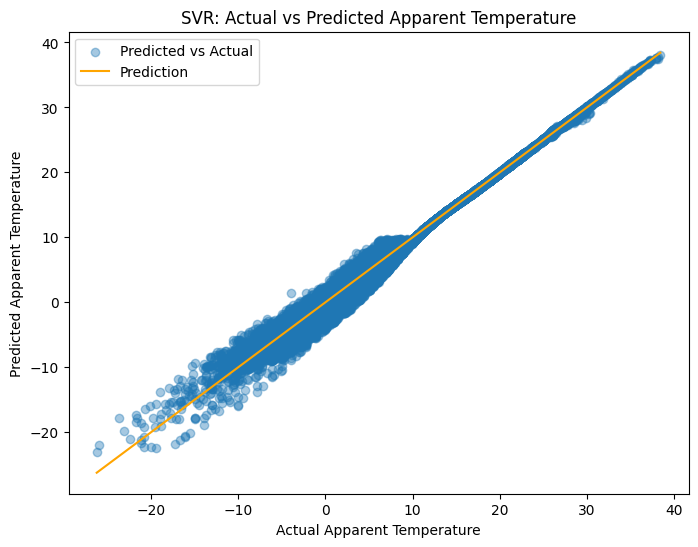

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', label='Prediction')
plt.xlabel('Actual Apparent Temperature')
plt.ylabel('Predicted Apparent Temperature')
plt.title('SVR: Actual vs Predicted Apparent Temperature')
plt.legend()
plt.show()


The SVR model achieved a Mean Squared Error of 1.151, a Root Mean Squared Error of 1.073, and an R-squared value of 0.990 on the test set, indicating high predictive accuracy. The training and test metrics are nearly the same, showing that the model generalizes well and is neither overfitting nor underfitting. Overall, the SVR model provides a strong and consistent fit for predicting apparent temperature based on humidity and temperature.

# **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Humidity', 'Temperature (C)']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_lr = poly_pipeline.predict(X_test)

poly_mse = mean_squared_error(y_test, y_pred_lr)
poly_rmse = np.sqrt(poly_mse)

print("Polynomial Linear Regression")
print("Test R²:", r2_score(y_test, y_pred_lr))
print("Test MSE:", mean_squared_error(y_test, y_pred_lr))
print("Test RMSE:", poly_rmse)

Polynomial Linear Regression
Test R²: 0.9866843099261794
Test MSE: 1.4995496950689904
Test RMSE: 1.2245610213741862


In [ ]:
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("\nRidge Regression")
print("Best alpha:", ridge_grid.best_params_['ridge__alpha'])
print("CV R²:", ridge_grid.best_score_)

ridge_pred = ridge_grid.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print("Test R²:", r2_score(y_test, ridge_pred))
print("Test MSE:", mean_squared_error(y_test, ridge_pred))
print("Test RMSE:", ridge_rmse)


Ridge Regression
Best alpha: 1
CV R²: 0.9870140661839966
Test R²: 0.9866845363229747
Test MSE: 1.499524199338498
Test RMSE: 1.2245506111788511


In [ ]:
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

lasso_params = {'lasso__alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("\nLasso Regression")
print("Best alpha:", lasso_grid.best_params_['lasso__alpha'])
print("CV R²:", lasso_grid.best_score_)

lasso_pred = lasso_grid.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

print("Test R²:", r2_score(y_test, lasso_pred))
print("Test MSE:", mean_squared_error(y_test, lasso_pred))
print("Test RMSE:", lasso_rmse)


Lasso Regression
Best alpha: 0.01
CV R²: 0.986965048803061
Test R²: 0.9866682226857526
Test MSE: 1.5013613635850531
Test RMSE: 1.2253005197032494


All models perform extremely well, with R² ≈ 0.986, meaning they explain ~98.6% of the variance in apparent temperature. MSE is very low (≈ 1.5), meaning predictions are close to the actual values.

Also, adding interaction terms (polynomial features: humdity and temperature) improved the fit. Regularization (Ridge & Lasso) slightly altered coefficients but didn’t improve accuracy, likely because the model wasn't overfitting much to begin with.

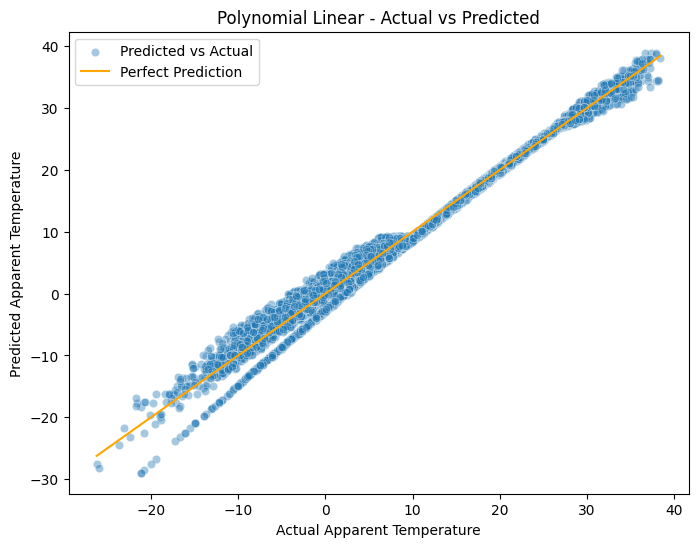

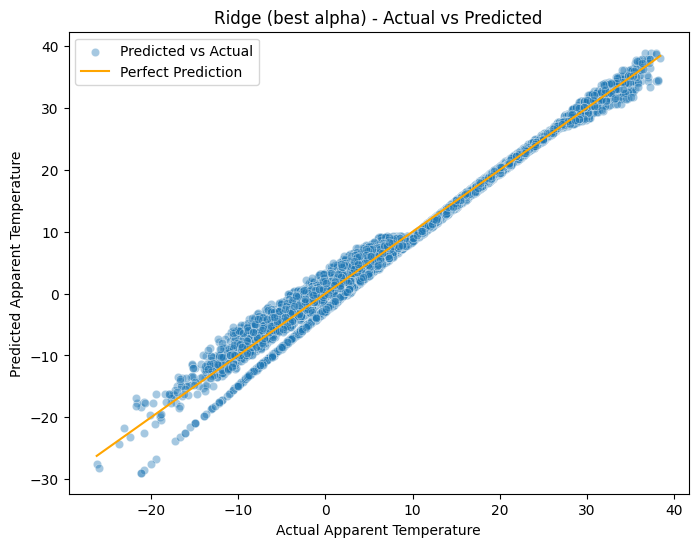

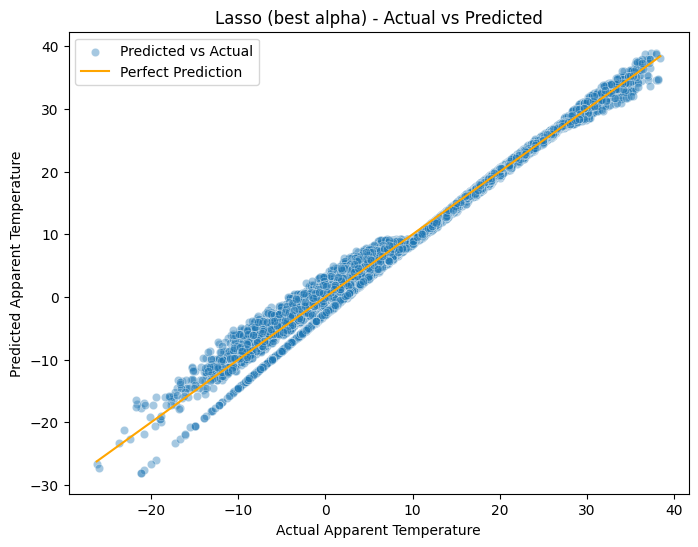

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models_predictions = {
    'Polynomial Linear': y_pred_lr,
    'Ridge (best alpha)': ridge_pred,
    'Lasso (best alpha)': lasso_pred
}

for model_name, y_pred in models_predictions.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', label='Perfect Prediction')
    plt.xlabel('Actual Apparent Temperature')
    plt.ylabel('Predicted Apparent Temperature')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()

All three plots (Linear, Ridge, Lasso) show tight clustering around the diagonal line, indicating accurate predictions.
The orange line represents perfect predictions. The data distribution closely hugs the line, especially in the middle ranges (0°C to 30°C). Slight deviations at the extremes (below -20°C and above 35°C) suggest a tiny bit of bias or reduced confidence in rare temperature ranges.

A polynomial regression model with interaction terms based on Humidity and Temperature is highly accurate in predicting Apparent Temperature. Regularization (Ridge/Lasso) helps with model robustness but isn’t critical here because overfitting risk is low.

All models achieved high performance (R² > 0.986), with minimal prediction error (MSE ≈ 1.5). Ridge and Lasso regularization were applied to improve generalization, but due to the strong natural correlation between features and target, they provided no significant accuracy gain. The visual plots further confirmed the models' reliability, with predicted values tightly aligned with actual values across all test cases.

In [ ]:
from ipywidgets import interact, FloatSlider, FloatText
import ipywidgets as widgets
from IPython.display import display

def predict_apparent_temperature(humidity, temperature_c):
    input_data = pd.DataFrame([[humidity, temperature_c]], columns=['Humidity', 'Temperature (C)'])
    predicted_temp = poly_pipeline.predict(input_data)
    return predicted_temp[0]

def interactive_prediction(humidity, temperature_c):
    prediction = predict_apparent_temperature(humidity, temperature_c)
    print(f"Predicted Apparent Temperature: {prediction:.2f} °C")

humidity_widget = FloatSlider(value=0.75, min=0.0, max=1.0, step=0.01, description='Humidity')
temperature_widget = FloatText(value=25.0, description='Temperature (°C)')

interact(interactive_prediction, humidity=humidity_widget, temperature_c=temperature_widget)

interactive(children=(FloatSlider(value=0.75, description='Humidity', max=1.0, step=0.01), FloatText(value=25.…

<function __main__.interactive_prediction(humidity, temperature_c)>

# **Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error

X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

rf = RandomForestRegressor(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_var = explained_variance_score(y_test, y_pred_rf)
rf_max_err = max_error(y_test, y_pred_rf)

print("\nRandom Forest Evaluation:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R²: {rf_r2:.4f}")
print(f"Explained Variance: {rf_var:.4f}")
print(f"Max Error: {rf_max_err:.4f}")


Random Forest Evaluation:
MAE: 0.5889
MSE: 1.2824
RMSE: 1.1324
R²: 0.9886
Explained Variance: 0.9886
Max Error: 6.6413


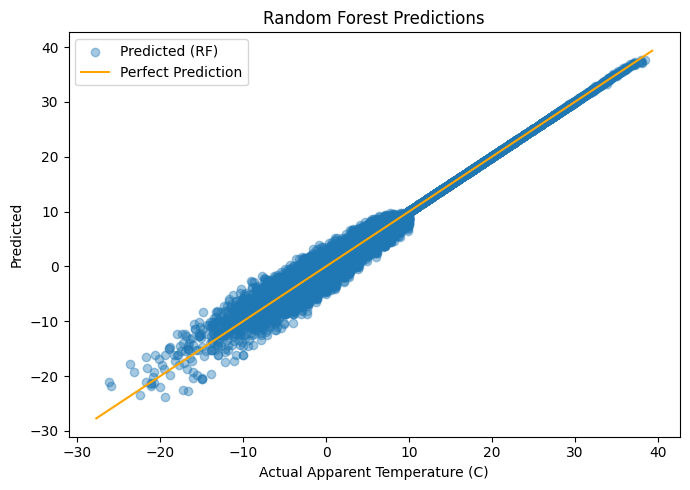

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.4, label='Predicted (RF)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', label='Perfect Prediction')
plt.title('Random Forest Predictions')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.show()

The **Random Forest** method showed strong predictive performance for apparent temperature based on temperature and humidity.

**Evaluation Metrics**
- **MAE (Mean Absolute Error):** 0.5889  
- **MSE (Mean Squared Error):** 1.2824  
- **RMSE (Root MSE):** 1.1324  
- **R² Score:** 0.9886  
- **Explained Variance:** 0.9886  
- **Max Error:** 6.6413  

**Graph Insights**
- Predictions align closely with the ideal red dashed line.
- Slight underprediction in extremely low temperature zones.

#**Neural Networks**

In [ ]:
nn = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=500, random_state=10)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, y_pred_nn)
nn_var = explained_variance_score(y_test, y_pred_nn)
nn_max_err = max_error(y_test, y_pred_nn)

print("\nNeural Network Evaluation:")
print(f"MAE: {nn_mae:.4f}")
print(f"MSE: {nn_mse:.4f}")
print(f"RMSE: {nn_rmse:.4f}")
print(f"R²: {nn_r2:.4f}")
print(f"Explained Variance: {nn_var:.4f}")
print(f"Max Error: {nn_max_err:.4f}")


Neural Network Evaluation:
MAE: 0.6224
MSE: 1.1021
RMSE: 1.0498
R²: 0.9902
Explained Variance: 0.9903
Max Error: 6.2536


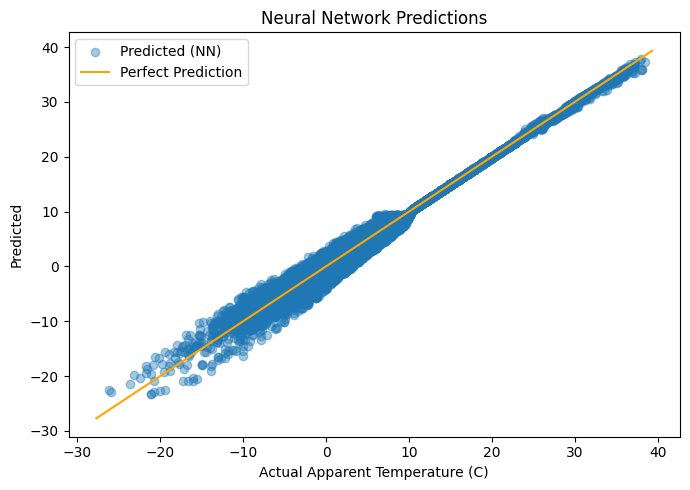

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_nn, alpha=0.4, label='Predicted (NN)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', label='Perfect Prediction')
plt.title('Neural Network Predictions')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.show()

The **Neural Network** method performed well.

**Evaluation Metrics**
- **MAE:** 0.6224  
- **MSE:** 1.1021  
- **RMSE:** 1.0498  
- **R² Score:** 0.9902  
- **Explained Variance:** 0.9903  
- **Max Error:** 6.2536  

**Graph Insights**
- Very tight fit to the perfect prediction line.
- Slightly better generalization than Random Forest.
- Less spread on outliers, particularly in extreme cold.

**Summary:**
- **Random Forest**: More consistent (better MAE), easier to interpret.
- **Neural Network**: Slightly better overall accuracy (lower RMSE, higher R²).

**Recommendation:**
- Choose **Random Forest** for explainability and speed.
- Choose **Neural Network** for marginally better accuracy and generalization.

#**Comparison Matrix**

In [ ]:
comparison_df = pd.DataFrame([
    {
        'Model': 'KNN',
        'RMSE': knn_rmse,
        'R²': knn_r2,
        'MSE': knn_mse
    },
        {
        'Model': 'Support Vector Regression',
        'RMSE': svr_rmse,
        'R²': svr_r2,
        'MSE': svr_mse
    },
    {
        'Model': 'Polynomial Linear Regression',
        'MSE': poly_mse,
        'RMSE': poly_rmse
    },
    {
        'Model': 'Ridge Regression',
        'R²': ridge_grid.best_score_,
        'MSE': ridge_mse,
        'RMSE': ridge_rmse
    },
    {
        'Model': 'Lasso Regression',
        'R²': lasso_grid.best_score_,
        'MSE': lasso_mse,
        'RMSE': lasso_rmse
    },
    {
        'Model': 'Random Forest',
        'MAE': rf_mae,
        'MSE': rf_mse,
        'RMSE': rf_rmse,
        'R²': rf_r2,
        'Explained Variance': rf_var,
        'Max Error': rf_max_err
    },
    {
        'Model': 'Neural Network',
        'MAE': nn_mae,
        'MSE': nn_mse,
        'RMSE': nn_rmse,
        'R²': nn_r2,
        'Explained Variance': nn_var,
        'Max Error': nn_max_err
    },
])

print("\n=== Final Model Evaluation Matrix ===")
print(comparison_df)



=== Final Model Evaluation Matrix ===
                          Model      RMSE        R²       MSE       MAE  \
0                           KNN  1.043533  0.990330  1.088960       NaN   
1     Support Vector Regression  1.073061  0.989775  1.151459       NaN   
2  Polynomial Linear Regression  1.224561       NaN  1.499550       NaN   
3              Ridge Regression  1.224551  0.987014  1.499524       NaN   
4              Lasso Regression  1.225301  0.986965  1.501361       NaN   
5                 Random Forest  1.132422  0.988613  1.282380  0.588854   
6                Neural Network  1.049820  0.990213  1.102122  0.622447   

   Explained Variance  Max Error  
0                 NaN        NaN  
1                 NaN        NaN  
2                 NaN        NaN  
3                 NaN        NaN  
4                 NaN        NaN  
5            0.988613   6.641333  
6            0.990288   6.253557  


The Neural Network model stands out as the best performer across the evaluation metrics. It achieves the lowest RMSE (1.0498), indicating better predictive accuracy and smaller errors compared to other models like KNN and SVR. With the highest R² (0.9902) and explained variance (0.9903), it demonstrates excellent model fit and the ability to capture the underlying patterns in the data. Additionally, its MSE (1.1021) is lower than that of other models, reflecting better overall performance in terms of error magnitude. The Neural Network also has a lower max error (6.25) compared to Random Forest (6.64), further reinforcing its reliability. Overall, the Neural Network model provides a well-balanced, high-performing solution for this regression task.

# **Project Development**
Lynn Wei
* Cleaned up the data
* Developed the kNN model and tested it on the data
* Developed the SVR model and tested it on the data
* Edited the final presentation recording

Michael Lee

*   Developed the Linear Regression models through Polynomial Linear Regression,
Ridge regression, and Lasso Regression. Then, tested the models on the data.
*   Developed a little user interactive widget using the polynomial linear regression model to predict the apparent temperature as it's output based on the user's input on  temperature through the textbox and humidity using the slider.



Samir Vera Guzman
*  Developed the Random Forest and Neural Networks Regression Models and tested it on the data
*   Put together a matrix stating the different results and which one was better
*   Published it on a GitHub Repository

